<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/6/6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 本コードは以下のサイトを参考にしました
- https://qiita.com/sz_dr/items/f3d6630137b184156a67

In [1]:
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from itertools import product

In [2]:
iris = datasets.load_iris()

#特徴量は最初の2つ, クラスラベルも最初の2つを使う
X = iris.data[:100, :2]

#特徴量にノイズを加える
E = np.random.uniform(0, 1.0, size=np.shape(X))
X += E
y = iris.target[:100]

In [3]:
#meshのステップサイズ
h = 0.02

#コストパラメータ
Cs = [2 ** -5, 2 ** 15]

#RBFカーネルのパラメータ
gammas = [2 ** -15, 2 ** 3]

svms = [svm.SVC(C=C, gamma=gamma).fit(X, y) for C, gamma in product(Cs, gammas)]
titles = ["C: small, gamma: small", "C: small, gamma: large",
    "C: large, gamma: small", "C: large, gamma: large"]

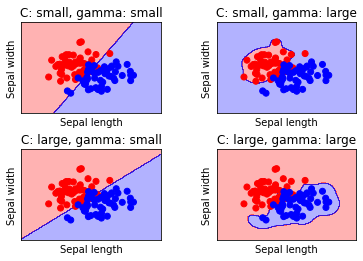

In [4]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

from matplotlib.colors import ListedColormap
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

for i, clf in enumerate(svms):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()